In [1]:
import pandas as pd
dataset = pd.read_csv("https://data.stadt-zuerich.ch/dataset/a9febb98-23dd-4438-95c6-9cad417d0291/resource/a90b0184-c809-48b4-87ca-91e5811da885/download/bev325od3250.csv")
#print(dataset.head())

In [2]:
# latest year
max_year = dataset["StichtagDatJahr"].max()
data_year = dataset[dataset["StichtagDatJahr"]==max_year]
# latest month in latest year
max_mon = data_year["StichtagDatMM"].max()
data_mon = data_year[data_year["StichtagDatMM"]==max_mon]
print(data_mon.head())
# Create a text representation of month and year for labeling charts
mon_de = {1:"Januar", 2:"Februar", 3:"März", 4:"April", 5:"Mai", 6:"Juni", 7:"Juli", 8:"August", 9:"September", 10:"Oktober", 11:"November", 12:"Dezember" }
text_year_mon = mon_de[max_mon] + " " + str(max_year)
print(text_year_mon)

        StichtagDatJahr  StichtagDatMM StichtagDatMonat  StichtagDat  SexCd  \
181007             2020              4            April        22035      1   
181008             2020              4            April        22035      1   
181009             2020              4            April        22035      1   
181010             2020              4            April        22035      1   
181011             2020              4            April        22035      1   

         SexLang  AlterV20Sort AlterV20Kurz  HerkunftCd  HerkunftLang  \
181007  männlich             1         0-19           1  Schweizer/in   
181008  männlich             1         0-19           1  Schweizer/in   
181009  männlich             1         0-19           1  Schweizer/in   
181010  männlich             1         0-19           1  Schweizer/in   
181011  männlich             1         0-19           1  Schweizer/in   

        KreisCd KreisLang  QuarCd     QuarLang DatenstandCd DatenstandLang  \
181007  

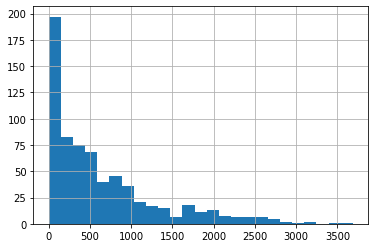

In [3]:
import matplotlib.pyplot as plt
# distribution of aggregated cells/crossings - not very meaningfull
# bins is by default 10 
data_mon["AnzBestWir"].hist(bins=25)
plt.show()

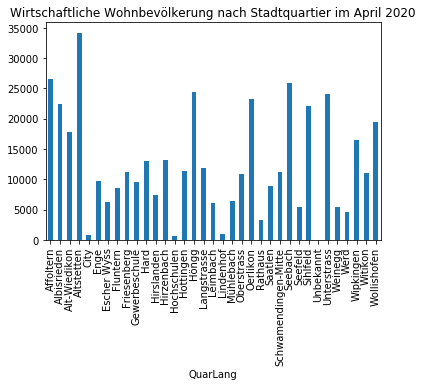

In [4]:
bev_by_quar = data_mon.groupby("QuarLang")["AnzBestWir"].sum()
bev_by_quar.plot(kind="bar", title="Wirtschaftliche Wohnbevölkerung nach Stadtquartier im " + text_year_mon)
plt.show()

In [5]:
# Select one quarter. 21 = Wollishofen
data_quar = dataset[dataset["QuarCd"]==21].copy()
print(data_quar.head())

     StichtagDatJahr  StichtagDatMM StichtagDatMonat  StichtagDat  SexCd  \
4               1998              1           Januar        13910      1   
38              1998              1           Januar        13910      1   
72              1998              1           Januar        13910      2   
106             1998              1           Januar        13910      2   
140             1998              1           Januar        13910      1   

      SexLang  AlterV20Sort AlterV20Kurz  HerkunftCd  HerkunftLang  KreisCd  \
4    männlich             1         0-19           1  Schweizer/in        2   
38   männlich             1         0-19           2  Ausländer/in        2   
72   weiblich             1         0-19           1  Schweizer/in        2   
106  weiblich             1         0-19           2  Ausländer/in        2   
140  männlich             2        20-39           1  Schweizer/in        2   

    KreisLang  QuarCd     QuarLang DatenstandCd  DatenstandLang  Anz

In [6]:
# the date stored as StichtagDat is SAS specific and represents the number of days since 1960-01-01 and is useless for python
# create a new date value for the last day in the year/month combination
from calendar import monthrange
from datetime import datetime
monthrange(2002,7)

# custom function to create a iso-date-string with the last day of the given year and month
def create_date_lastday(year,month):
    # monthrange returns a list with weekday of first day of the month and number of days in month (which we need here)
    lastday = monthrange(year,month)[1]
    date = datetime(year=year, month=month, day=lastday)
    return date

# test function
#print(create_date_lastday(2020,7))
        
data_quar['StichtagISO'] = data_quar.apply(lambda x: create_date_lastday(x['StichtagDatJahr'],x['StichtagDatMM']),axis=1)
print(data_quar.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5360 entries, 4 to 181659
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StichtagDatJahr   5360 non-null   int64         
 1   StichtagDatMM     5360 non-null   int64         
 2   StichtagDatMonat  5360 non-null   object        
 3   StichtagDat       5360 non-null   int64         
 4   SexCd             5360 non-null   int64         
 5   SexLang           5360 non-null   object        
 6   AlterV20Sort      5360 non-null   int64         
 7   AlterV20Kurz      5360 non-null   object        
 8   HerkunftCd        5360 non-null   int64         
 9   HerkunftLang      5360 non-null   object        
 10  KreisCd           5360 non-null   int64         
 11  KreisLang         5360 non-null   object        
 12  QuarCd            5360 non-null   int64         
 13  QuarLang          5360 non-null   object        
 14  DatenstandCd      5360

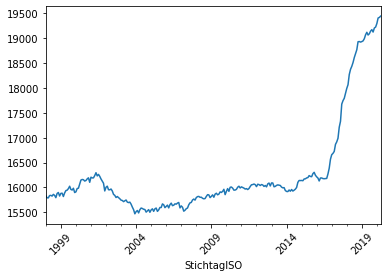

In [7]:
quar_bev_by_mon = data_quar.groupby("StichtagISO")["AnzBestWir"].sum()
# rot = rotate labels by 45 degrees
quar_bev_by_mon.plot(x="StichtagISO", y="AnzBestWir", kind="line", rot=45)
plt.show()

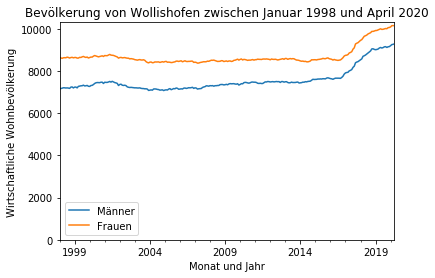

In [8]:
text_quarter = pd.unique(data_quar["QuarLang"])[0]
text_min_date = mon_de[data_quar["StichtagISO"].min().month] + " " + str(data_quar["StichtagISO"].min().year)
text_max_date = mon_de[data_quar["StichtagISO"].max().month] + " " + str(data_quar["StichtagISO"].max().year)
quar_bev_by_mon_m = data_quar[data_quar["SexLang"]=="männlich"].groupby("StichtagISO")["AnzBestWir"].sum()
quar_bev_by_mon_w = data_quar[data_quar["SexLang"]=="weiblich"].groupby("StichtagISO")["AnzBestWir"].sum()
quar_bev_by_mon_m.plot(x="StichtagISO", y="AnzBestWir", kind="line")
quar_bev_by_mon_w.plot(x="StichtagISO", y="AnzBestWir", kind="line")
plt.legend(["Männer", "Frauen"])
# Start y-axis at zero
plt.ylim(ymin=0)
plt.xlabel("Monat und Jahr")
plt.ylabel("Wirtschaftliche Wohnbevölkerung")
plt.title("Bevölkerung von " + text_quarter + " zwischen " + text_min_date + " und " + text_max_date)
plt.show()